# Three-phase line analyzer for non-sinusoidal systems

In [122]:
import numpy as np
from daqthreephi import DataGen
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, irfft

In [123]:
def rmsValue(array):
    """
    This function gives the RMS value of an array (function or signal)
    :param array: an np array
    :return: the RMS value
    """
    quad_array = array ** 2
    rms = np.sqrt(np.mean(quad_array))

    return rms


def activePower(voltage, current):
    """
    This function calculate the active Power of a given voltage and current
    :param voltage: numpy voltages array
    :param current: numpy currents array
    :return: active power of the given arrays
    """
    instantPower = voltage * current
    actPower = np.mean(instantPower)

    return actPower


def reactivePower(voltage, current):
    """
    Calculate the reactive power of a line using the
    Fryze definition
    :param voltage: array with the voltages
    :param current: array with the currents
    :return: Fryze reactive Power
    """

    P = activePower(voltage, current)
    Irms = rmsValue(current)
    Vrms = rmsValue(voltage)
    S = Irms * Vrms
    Qf = np.sqrt(S ** 2 - P ** 2)

    return Qf


def getCoeffs(ft):
    """
    This function gets just the important harmonics from the fft
    :param ft: numpy array with all the coefficients of fft
    :return: array with the values of each harmonic
    """
    steps = np.arange(0, len(ft), 5)
    coefs = np.zeros(len(steps))
    n = 0
    for i in steps:
        coefs[n] = ft[i]
        n += 1

    return coefs


def signalThd(coeffs):
    """
    This function calculates the Total Harmonic Distortion for a given
    Fourier coefficients
    :param coeffs: np array with coefficients from the fft
    :return: thd in percent [%]
    """
    quadCoeffs = (coeffs[2:]) ** 2
    dist = np.sum(quadCoeffs)
    thd = (np.sqrt(dist) / coeffs[1]) * 100

    return thd

def compareTHD(thd_value, signal):
    """

    :param thd_value:
    :param signal:
    :return:
    """
    pass

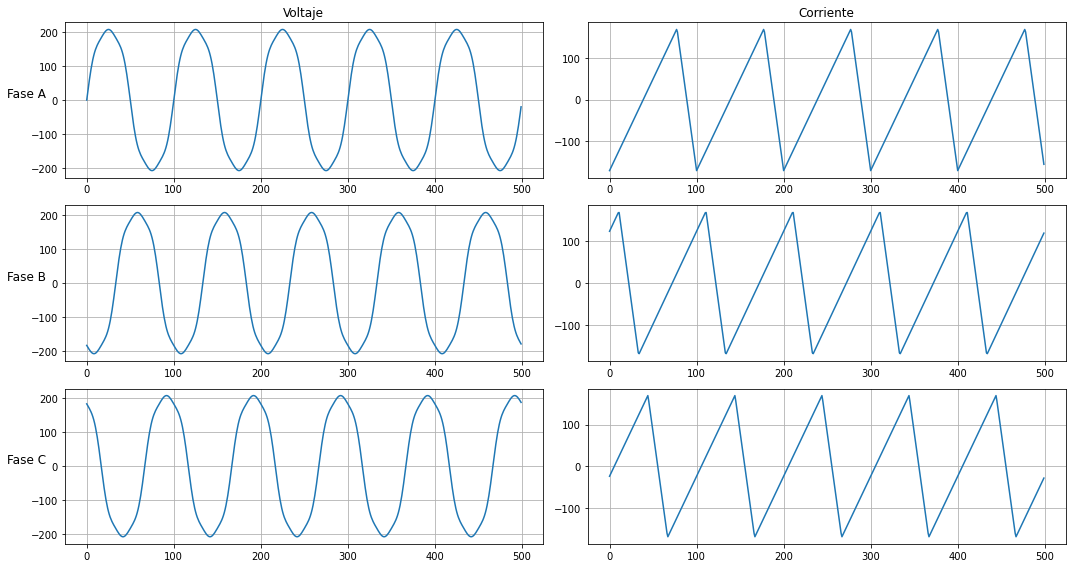

In [124]:
system = DataGen(60)
system.plot()

In [125]:
voltages, currents = system.get_data()

# Obtain every voltage and current value
v1 = voltages[0]
v2 = voltages[1]
v3 = voltages[2]

i1 = currents[0]
i2 = currents[1]
i3 = currents[2]

# Calculate the RMS value of the tensions and currents
v1_rms = rmsValue(v1)
v2_rms = rmsValue(v2)
v3_rms = rmsValue(v3)

i1_rms = rmsValue(i1)
i2_rms = rmsValue(i2)
i3_rms = rmsValue(i3)

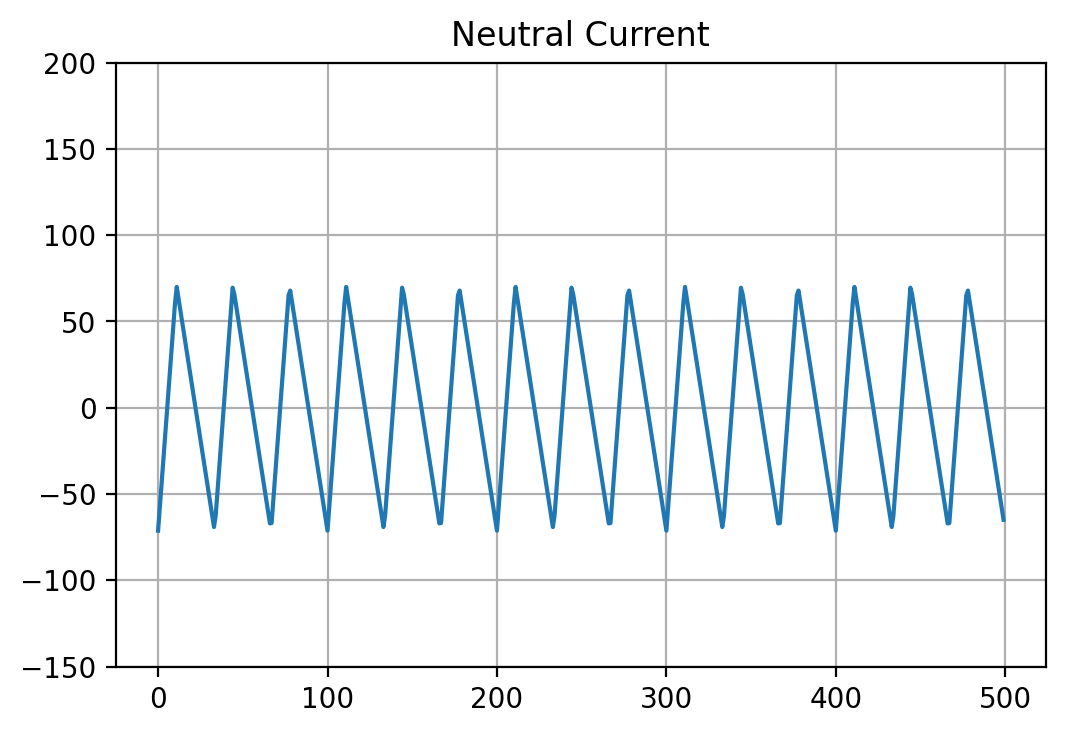

In [126]:
# Calculation and graph of the current in the neutral
i_n = i1 + i2 + i3

ticks = np.arange(-150, 201, 50)

plt.figure(dpi=200)
plt.plot(i_n)
plt.title("Neutral Current")
plt.yticks(ticks)
plt.grid()
plt.show()

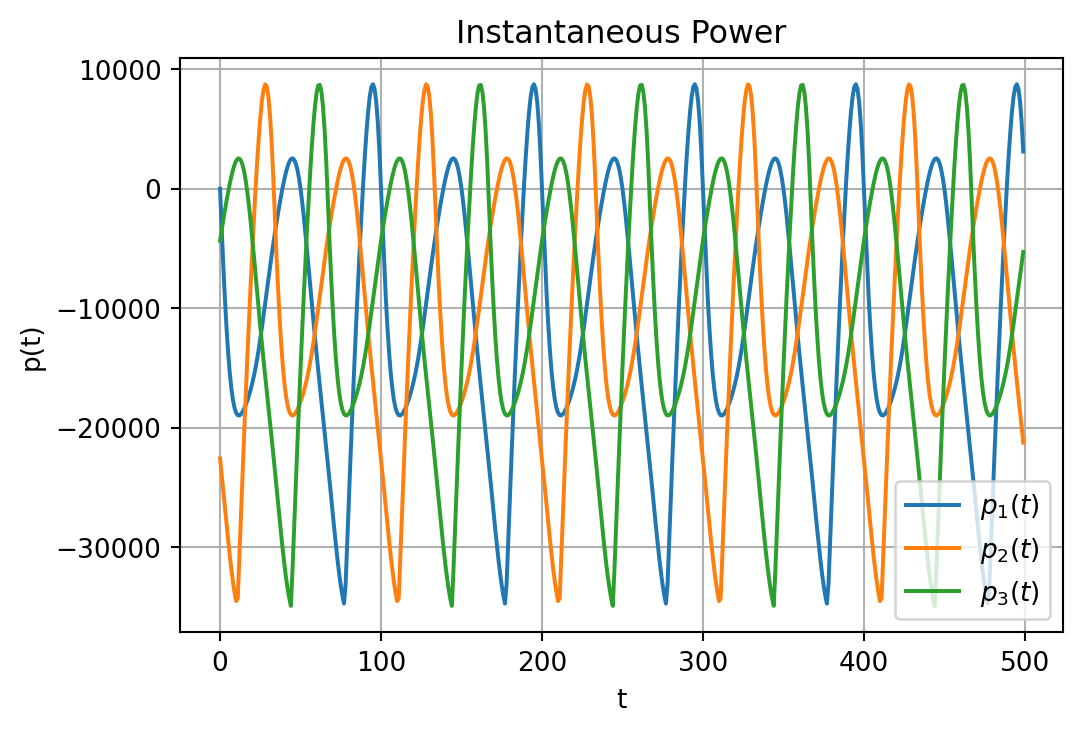

In [127]:
# Calculate the power of the system

# Instantaneous power
p1ins = v1 * i1
p2ins = v2 * i2
p3ins = v3 * i3

plt.figure(dpi=190)
plt.plot(p1ins, label="$p_1(t)$")
plt.plot(p2ins, label="$p_2(t)$")
plt.plot(p3ins, label="$p_3(t)$")
plt.legend()
plt.title("Instantaneous Power")
plt.xlabel("t")
plt.ylabel("p(t)")
plt.grid()
plt.show()

# Active power for each phase
p1 = activePower(v1, i1)
p2 = activePower(v2, i2)
p3 = activePower(v3, i3)

pt = p1 + p2 + p3

# Apparent power for each phase
s1 = v1_rms * i1_rms
s2 = v2_rms * i2_rms
s3 = v3_rms * i3_rms

# Fryze reactive power for each phase
q1 = reactivePower(v1, i1)
q2 = reactivePower(v2, i2)
q3 = reactivePower(v3, i3)

qt = q1 + q2 + q3

In [128]:
# Potencia fasorial del sistema
sfas = pt + qt * 1j
s_vector = np.array(pt, qt)
labels = ["P", "Qf"]
theta = np.angle(sfas, deg=True)
print(sfas)
print(round(theta), "°")


(-31990.30425664907+33249.25940481083j)
134 °


In [129]:
# Fast Fourier Transform
Fs = 6000  # Sample Frequency [Hz]
N = len(i1)  # Amount of data

xf = fftfreq(N, 1 / Fs)[: N // 2]

# Fourier's coefficients for each voltage
v1f = fft(v1)
v1f_norm = 2 / N * np.abs(v1f[0:N // 2])

v2f = fft(v2)
v2f_norm = 2 / N * np.abs(v2f[0:N // 2])

v3f = fft(v3)
v3f_norm = 2 / N * np.abs(v3f[0:N // 2])

# Fourier's coefficients for each current
i1f = fft(i1)
i1f_norm = 2 / N * np.abs(i1f[0:N // 2])

i2f = fft(i2)
i2f_norm = 2 / N * np.abs(i2f[0:N // 2])

i3f = fft(i3)
i3f_norm = 2 / N * np.abs(i3f[0:N // 2])

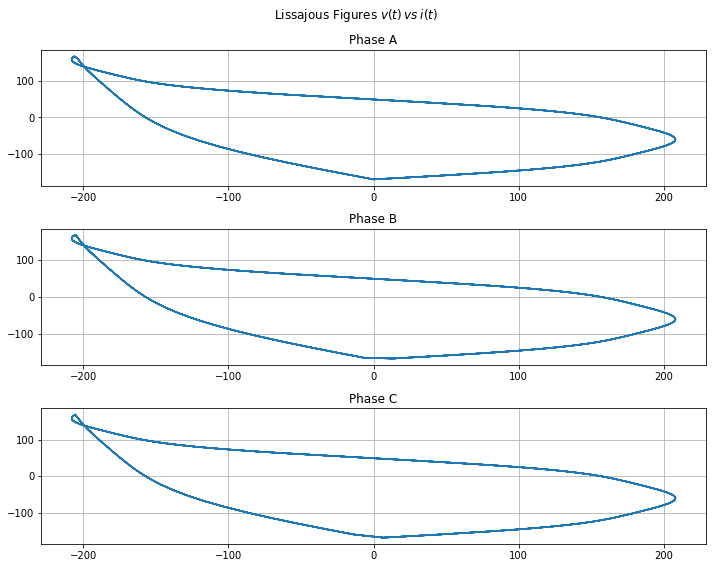

In [132]:
# Lissajous Figures

fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(10,8))
fig.suptitle("Lissajous Figures $v(t)\:vs\:i(t)$", size='large')
ax1.plot(v1, i1)
ax1.set_title("Phase A")
ax1.grid()
ax2.plot(v2, i2)
ax2.set_title("Phase B")
ax2.grid()
ax3.plot(v3, i3)
ax3.set_title("Phase C")
ax3.grid()

fig.tight_layout()

plt.show()


In [131]:
# Calculus of THD for voltages and currents
# THDv
thdv1 = signalThd(getCoeffs(v1f_norm))
thdv2 = signalThd(getCoeffs(v2f_norm))
thdv3 = signalThd(getCoeffs(v3f_norm))

# THDi
thdi1 = signalThd(getCoeffs(i1f_norm))
thdi2 = signalThd(getCoeffs(i2f_norm))
thdi3 = signalThd(getCoeffs(i3f_norm))